In [4]:
#os Operative System to allow Pandas access to folders in your own OS
import os
import pandas as pd

In [5]:
#getting a list of all the files in the folder from the directory
files = [file for file in os.listdir('./Sales_Data')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [6]:
#Merge data from each month into one CSV

In [7]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

In [8]:
#Read in updated dataframe
all_data = pd.read_csv("all_data_copy.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
# Find NAN
nan_df = all_data[all_data.isnull().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
all_data.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [12]:
#Adding a MONTH column getting the first 2 numbers from Order Date
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [13]:
all_data.loc[all_data['Month'].str.contains('Or')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [14]:
all_data = all_data[~all_data['Month'].isin(['Or'])]

In [15]:
all_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [16]:
#checking if we got the right nmb of entries -first df:186305 entries, actual df:185950 - 355 dropped
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


In [17]:
#changing Month to numerical
all_data['Month'] = all_data['Month'].astype('int32')

In [18]:
# Make other columns correct type
all_data['Order ID']=pd.to_numeric(all_data['Order ID'])
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(2)
memory usage: 10.6+ MB


In [20]:
#adding city+State column

In [21]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x)+' '+get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA


In [22]:
all_data['tot_price']=all_data['Quantity Ordered']*all_data['Price Each'].astype('int')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,tot_price
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas TX,22
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston MA,99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,600
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,11
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,11


In [26]:
all_data.groupby(['Month'], as_index=False).sum()['tot_price']

0     1813956
1     2191696
2     2794068
3     3374951
4     3138287
5     2566187
6     2635443
7     2234194
8     2087435
9     3719205
10    3184394
11    4591824
Name: tot_price, dtype: int64

In [27]:
#What city purchesed the most product?
all_data.groupby(['City']).sum().sort_values('tot_price', ascending=False)

,Order ID,Quantity Ordered,Price Each,Month,tot_price
City,,,,,
San Francisco CA,10304443952,50239,8211461.74,315520,8223669
Los Angeles CA,6811084693,33289,5421435.23,208325,5426973
New York City NY,5736333884,27932,4635370.83,175741,4642872
Boston MA,4598265261,22528,3637409.77,141112,3644327
Atlanta GA,3423838407,16602,2779908.20,104794,2782841
Dallas TX,3415643578,16730,2752627.82,104620,2755117
Seattle WA,3406693974,16553,2733296.01,104941,2735070
Portland OR,2305594747,11303,1860558.22,70621,1862056
Austin TX,2280982185,11153,1809873.61,69829,1811054


In [28]:
#sales by product
all_data.pivot_table(index=['Product'],columns=['City'], values='tot_price',fill_value='na')

City,Atlanta GA,Austin TX,Boston MA,Dallas TX,Los Angeles CA,New York City NY,Portland ME,Portland OR,San Francisco CA,Seattle WA
Product,,,,,,,,,,
20in Monitor,110.289941,109.956140,109.000000,109.961765,109.666667,109.981982,109.000000,109.500000,109.768379,109.677019
27in 4K Gaming Monitor,389.790650,389.000000,390.156018,390.624217,389.000000,389.926190,389.000000,390.117816,390.068681,390.451493
27in FHD Monitor,150.020548,150.674157,149.751576,150.798276,149.734593,149.418148,149.000000,149.719807,149.909040,149.516464
34in Ultrawide Monitor,382.171548,379.000000,380.133034,379.741683,379.795383,380.314451,379.000000,380.162577,380.051318,379.711069
AA Batteries (4-pack),3.960867,3.988796,4.084876,4.006497,4.048039,4.071028,3.982935,4.064685,4.010810,4.003062
AAA Batteries (4-pack),2.952441,3.057745,3.008257,3.035152,2.998491,2.974396,3.021097,3.069519,3.004055,3.012315
Apple Airpods Headphones,150.356295,150.850340,151.004872,150.884583,151.284666,151.370851,153.289474,150.871080,151.133603,150.960000
Bose SoundSport Headphones,99.643454,100.854467,99.988588,99.750711,100.226298,100.285714,100.112360,99.561702,99.903559,99.468307
Flatscreen TV,301.481481,300.000000,301.633394,300.715990,301.243094,301.440000,300.000000,301.204819,301.305483,300.802139


In [29]:
import seaborn as sns

<AxesSubplot:xlabel='tot_price', ylabel='City'>

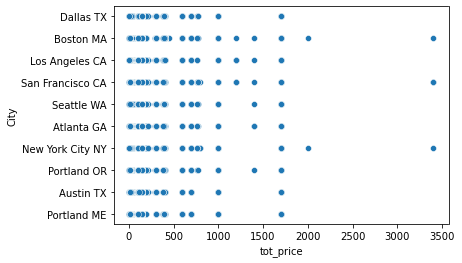

In [30]:
sns.scatterplot(x='tot_price', y='City', data=all_data)

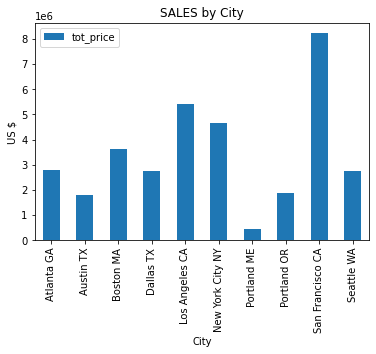

In [31]:
import matplotlib.pyplot as plt
all_data.groupby(['City'])[['tot_price']].sum().plot.bar()
plt.ylabel('US $')
plt.xlabel('City')
plt.title('SALES by City')
plt.show()

In [32]:
#What time should we display advertisements to maximize likelihood of customer's buying product?
#creating a time column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,tot_price,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas TX,22,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston MA,99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,600,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,11,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,11,9,27


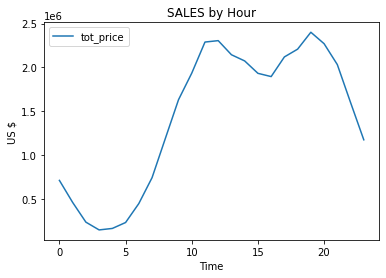

In [33]:
all_data.groupby(['Hour'])[['Product','tot_price']].sum().plot()
plt.ylabel('US $')
plt.xlabel('Time')
plt.title('SALES by Hour')
plt.show()

In [34]:
#finding order with multiple items
all_data.groupby('Order ID', as_index=False)['Product'].count().sort_values('Product', ascending=False).head(20)

,Order ID,Product
19639,160873,5
171228,312462,4
101702,242936,4
94564,235798,4
24431,165665,4
163568,304802,4
55381,196615,4
122684,263918,4
85391,226625,4
136641,277875,4


In [35]:
# select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]
# concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head(20)

C:\Users\lifes\AppData\Local\Temp/ipykernel_22924/4126512256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [36]:
#most sold pair of items
df2['Grouped'].value_counts().idxmax()

'iPhone,Lightning Charging Cable'

In [38]:
# get top 10 most frequent pairs of items
n = 10
df2['Grouped'].value_counts()[:n].index.tolist()

['iPhone,Lightning Charging Cable',
 'Google Phone,USB-C Charging Cable',
 'iPhone,Wired Headphones',
 'Vareebadd Phone,USB-C Charging Cable',
 'Google Phone,Wired Headphones',
 'iPhone,Apple Airpods Headphones',
 'Google Phone,Bose SoundSport Headphones',
 'Vareebadd Phone,Wired Headphones',
 'Google Phone,USB-C Charging Cable,Wired Headphones',
 'Vareebadd Phone,Bose SoundSport Headphones']